In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection**

In [ ]:
url = 'https://www.cryptodatadownload.com/cdd/Gemini_ETHUSD_1hr.csv'
dataset = pd.read_csv(url, index_col="Date", skiprows=1)
#dataset = pd.read_csv('Gemini_ETHUSD_1hr.csv', index_col="Date", skiprows=1)
dataset.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2022-04-26 04:00:00,1650945600000,ETHUSD,3001.21,3003.87,2998.17,3001.47,88.811435
2022-04-26 03:00:00,1650942000000,ETHUSD,2999.07,3005.78,2997.79,3001.21,103.177377
2022-04-26 02:00:00,1650938400000,ETHUSD,3003.49,3006.65,2985.92,2999.07,183.246060
2022-04-26 01:00:00,1650934800000,ETHUSD,3010.63,3016.25,3003.48,3003.49,315.646260
2022-04-26 00:00:00,1650931200000,ETHUSD,3006.82,3036.40,3006.82,3010.63,438.109320


**Data Pre-processing**

In [ ]:
dataset = dataset.iloc[::-1]
dataset.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2016-05-09 13:00:00,1462798800,ETHUSD,0.00,12.00,0.00,9.55,432.562115
2016-05-09 14:00:00,1462802400,ETHUSD,9.55,10.00,9.55,10.00,235.774075
2016-05-09 15:00:00,1462806000,ETHUSD,10.00,10.00,9.99,9.99,10.973567
2016-05-09 16:00:00,1462809600,ETHUSD,9.99,9.99,9.79,9.83,62.379450
2016-05-09 17:00:00,1462813200,ETHUSD,9.83,9.83,9.48,9.49,329.553213


In [ ]:
df = dataset.reset_index()
df

,Date,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
0,2016-05-09 13:00:00,1462798800,ETHUSD,0.00,12.00,0.00,9.55,432.562115
1,2016-05-09 14:00:00,1462802400,ETHUSD,9.55,10.00,9.55,10.00,235.774075
2,2016-05-09 15:00:00,1462806000,ETHUSD,10.00,10.00,9.99,9.99,10.973567
3,2016-05-09 16:00:00,1462809600,ETHUSD,9.99,9.99,9.79,9.83,62.379450
4,2016-05-09 17:00:00,1462813200,ETHUSD,9.83,9.83,9.48,9.49,329.553213
...,...,...,...,...,...,...,...,...
52256,2022-04-26 00:00:00,1650931200000,ETHUSD,3006.82,3036.40,3006.82,3010.63,438.109320
52257,2022-04-26 01:00:00,1650934800000,ETHUSD,3010.63,3016.25,3003.48,3003.49,315.646260
52258,2022-04-26 02:00:00,1650938400000,ETHUSD,3003.49,3006.65,2985.92,2999.07,183.246060
52259,2022-04-26 03:00:00,1650942000000,ETHUSD,2999.07,3005.78,2997.79,3001.21,103.177377


In [ ]:
df = df[["Open", "High", "Low", "Close","Volume"]]
#df = df[['Close']]
df.head()

,Open,High,Low,Close,Volume
0,0.00,12.00,0.00,9.55,432.562115
1,9.55,10.00,9.55,10.00,235.774075
2,10.00,10.00,9.99,9.99,10.973567
3,9.99,9.99,9.79,9.83,62.379450
4,9.83,9.83,9.48,9.49,329.553213


Text(0.5, 1.0, 'Price of Ethereum')

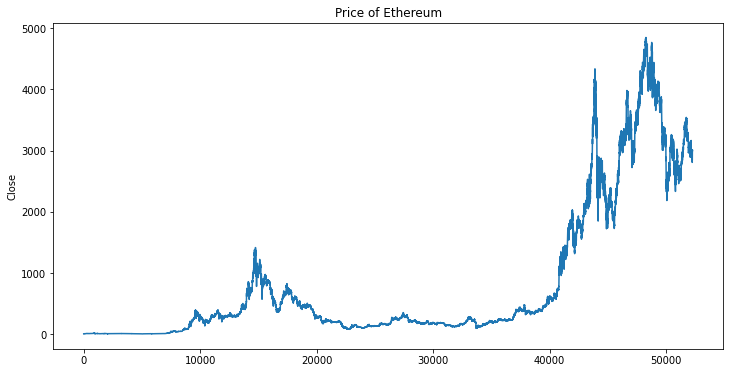

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y='Close', data=df).set_title("Price of Ethereum")

In [ ]:
SEQ_LEN = 120
FUTURE_PERIOD = 10

RATIO_TO_PREDICT = "Close"

In [ ]:
times = sorted(df.index.values)  # get the times
last_10 = sorted(df.index.values)[-int(0.1*len(times))] 
last_20 = sorted(df.index.values)[-int(0.2*len(times))]

test_df = df[(df.index >= last_10)]
validation_df = df[(df.index >= last_20) & (df.index < last_10)]  
train_df = df[(df.index < last_20)] 

In [ ]:
train_ = train_df.values
valid_ = validation_df.values
test_ = test_df.values

In [ ]:
print("train shape {0}".format(train_.shape))
print("valid shape {0}".format(valid_.shape))
print("test shape {0}".format(test_.shape))

train shape (41809, 5)
valid shape (5226, 5)
test shape (5226, 5)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_close = MinMaxScaler()

In [ ]:
x = train_[:,3].copy()
scale_close.fit(x.reshape(-1, 1))

MinMaxScaler()

In [ ]:
scaler.fit(train_)

train_ = scaler.transform(train_)

valid_ = scaler.transform(valid_)
test_ = scaler.transform(test_)

In [ ]:
train_.shape[0]

41809

In [ ]:
# Now perform exponential moving average smoothing for smooth curve of data
EMA = 0.0
gamma = 0.165
for ti in range(train_.shape[0]):
    EMA = gamma*train_[ti] + (1-gamma)*EMA
    train_[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_,valid_, test_],axis=0)

**Data Splitting**

In [ ]:
def split_data(data):
    X = []
    Y = []
    for i in range(SEQ_LEN, len(data)-FUTURE_PERIOD+1):
        X.append(data[i-SEQ_LEN:i])
        Y.append(data[i+(FUTURE_PERIOD-1), 3])
    return np.array(X), np.array(Y)

In [ ]:
X_train, y_train = split_data(train_)
X_test, y_test = split_data(test_)
X_valid, y_valid = split_data(valid_)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 5))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))

In [ ]:
y_train.shape

(41680,)

In [ ]:
print("train shape {0}".format(X_train.shape))
print("valid shape {0}".format(X_valid.shape))
print("test shape {0}".format(X_test.shape))

train shape (41680, 120, 5)
valid shape (5097, 120, 5)
test shape (5097, 120, 5)


In [ ]:
X_train_2, y_train_2 = split_data(train_)
X_train_2 = np.reshape(X_train_2, (X_train_2.shape[0], X_train_2.shape[1], 5))

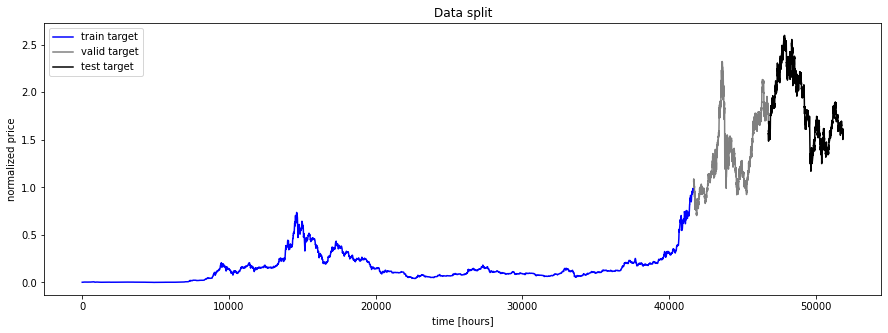

In [ ]:
## show predictions
plt.figure(figsize=(15, 5))

plt.plot(np.arange(y_train_2.shape[0]), y_train_2, color='blue', label='train target')

plt.plot(np.arange(y_train_2.shape[0], y_train_2.shape[0]+y_valid.shape[0]), y_valid,
         color='gray', label='valid target')

plt.plot(np.arange(y_train_2.shape[0]+y_valid.shape[0],
                   y_train_2.shape[0]+y_valid.shape[0]+y_test.shape[0]),
         y_test, color='black', label='test target')


plt.title('Data split')
plt.xlabel('time [hours]')
plt.ylabel('normalized price')
plt.legend(loc='best');

**LSTM Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization

# Initialize the RNN
model_LSTM1 = Sequential()
model_LSTM1.add(LSTM(units = 120, input_shape=(120, 5)))#activation = 'relu',
model_LSTM1.add(LeakyReLU(alpha=0.5))
model_LSTM1.add(Dropout(0.5))
model_LSTM1.add(BatchNormalization())
model_LSTM1.add(Dense(1))
model_LSTM1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 120)               60480     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 120)               0         
                                                                 
 dropout_1 (Dropout)         (None, 120)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 120)              480       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 121       
                                                                 
Total params: 61,081
Trainable params: 60,841
Non-trainable params: 240
________________________________________________

In [ ]:
model_LSTM1.compile(optimizer='adam', loss='mean_squared_error', metrics = ('MAPE'))

In [ ]:
history_LSTM1 = model_LSTM1.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=10, batch_size=128)

Epoch 1/10
326/326 [==============================] - 15s 32ms/step - loss: 0.0334 - MAPE: 558.0988 - val_loss: 1.1687 - val_MAPE: 75.4434
Epoch 2/10
326/326 [==============================] - 10s 30ms/step - loss: 9.9129e-04 - MAPE: 172.7109 - val_loss: 0.2793 - val_MAPE: 34.9994
Epoch 3/10
326/326 [==============================] - 10s 30ms/step - loss: 9.6849e-04 - MAPE: 169.1870 - val_loss: 0.0185 - val_MAPE: 6.6631
Epoch 4/10
326/326 [==============================] - 10s 30ms/step - loss: 8.9807e-04 - MAPE: 167.2556 - val_loss: 0.0072 - val_MAPE: 5.1694
Epoch 5/10
326/326 [==============================] - 10s 31ms/step - loss: 0.0010 - MAPE: 180.7648 - val_loss: 0.0094 - val_MAPE: 5.2200
Epoch 6/10
326/326 [==============================] - 10s 30ms/step - loss: 0.0010 - MAPE: 183.4235 - val_loss: 0.0089 - val_MAPE: 5.9106
Epoch 7/10
326/326 [==============================] - 10s 30ms/step - loss: 8.7376e-04 - MAPE: 170.0780 - val_loss: 0.0045 - val_MAPE: 3.4617
Epoch 8/10
326/3

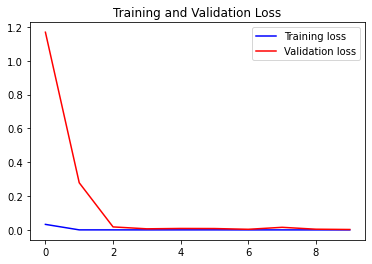

In [ ]:
loss = history_LSTM1.history['loss']
val_loss = history_LSTM1.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

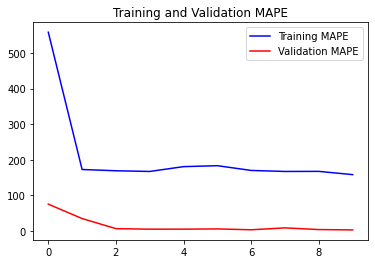

In [ ]:
mape = history_LSTM1.history['MAPE']
val_mape = history_LSTM1.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()

plt.show()

In [ ]:
pred_LSTM1 = model_LSTM1.predict(X_test)

In [ ]:
pred_LSTM1.shape

(5097, 1)

In [ ]:
y_valid.shape

(5097,)

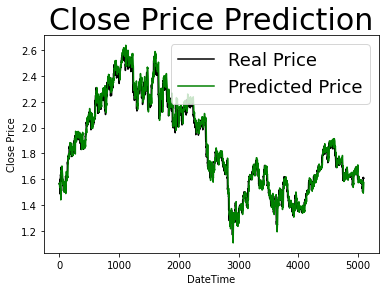

In [ ]:
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_LSTM1, color = 'green', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=30)
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [ ]:
import math

LSTM1_loss = model_LSTM1.evaluate(X_test, y_test, verbose=1)


#Err_LSTM1 = math.sqrt(LSTM1_loss)
print('\nThe error of the model with 1 layer LSTM is:', LSTM1_loss)

160/160 [==============================] - 2s 13ms/step - loss: 0.0031 - MAPE: 2.2396

The error of the model with 1 layer LSTM is: [0.0031098558101803064, 2.2395918369293213]


**CNN-LSTM model**

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization


model_LSTM2  =  Sequential() 
model_LSTM2.add(tf.keras.layers.Conv1D(120, 3, activation="relu",input_shape=(120, 5)))
model_LSTM2.add(tf.keras.layers.AveragePooling1D(4))
model_LSTM2.add(LSTM(units=120,  input_shape=(120, 5)))
model_LSTM2.add(LeakyReLU(alpha=0.5)) 
model_LSTM2.add(BatchNormalization())
model_LSTM2.add(Dropout(0.5))
model_LSTM2.add(Dense(1,activation='linear'))
model_LSTM2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 118, 120)          1920      
                                                                 
 average_pooling1d (AverageP  (None, 29, 120)          0         
 ooling1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 120)               115680    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 120)               0         
                                                                 
 batch_normalization (BatchN  (None, 120)              480       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 120)               0

In [ ]:
model_LSTM2.compile(optimizer='adam', loss='mean_squared_error', metrics = ('MAPE'))

In [ ]:
history_LSTM2 = model_LSTM2.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=10, batch_size=128)

Epoch 1/10
326/326 [==============================] - 21s 10ms/step - loss: 0.0268 - MAPE: 582.0281 - val_loss: 1.1284 - val_MAPE: 74.6614
Epoch 2/10
326/326 [==============================] - 2s 7ms/step - loss: 0.0010 - MAPE: 147.8080 - val_loss: 0.3571 - val_MAPE: 42.0827
Epoch 3/10
326/326 [==============================] - 2s 7ms/step - loss: 9.4173e-04 - MAPE: 150.5141 - val_loss: 0.0110 - val_MAPE: 6.4704
Epoch 4/10
326/326 [==============================] - 2s 7ms/step - loss: 9.4306e-04 - MAPE: 154.8690 - val_loss: 0.0094 - val_MAPE: 5.9028
Epoch 5/10
326/326 [==============================] - 2s 7ms/step - loss: 7.6820e-04 - MAPE: 139.1358 - val_loss: 0.0140 - val_MAPE: 7.3563
Epoch 6/10
326/326 [==============================] - 2s 7ms/step - loss: 9.4075e-04 - MAPE: 161.1190 - val_loss: 0.0042 - val_MAPE: 3.4813
Epoch 7/10
326/326 [==============================] - 2s 7ms/step - loss: 8.8993e-04 - MAPE: 160.9137 - val_loss: 0.0107 - val_MAPE: 6.0762
Epoch 8/10
326/326 [====

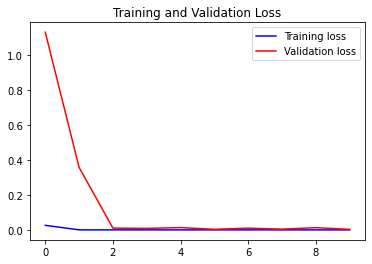

In [ ]:
loss_LSTM2 = history_LSTM2.history['loss']
val_loss_LSTM2 = history_LSTM2.history['val_loss']

epochs = range(len(loss_LSTM2))

plt.figure()

plt.plot(epochs, loss_LSTM2, 'b', label='Training loss')
plt.plot(epochs, val_loss_LSTM2, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

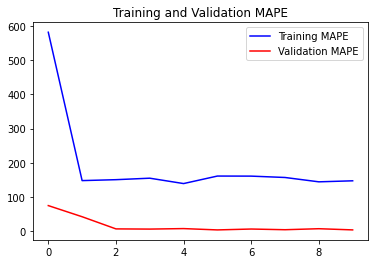

In [ ]:
mape = history_LSTM2.history['MAPE']
val_mape = history_LSTM2.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()

plt.show()

In [ ]:
X_test.shape

(5097, 120, 5)

In [ ]:
pred_LSTM2 = model_LSTM2.predict(X_test)

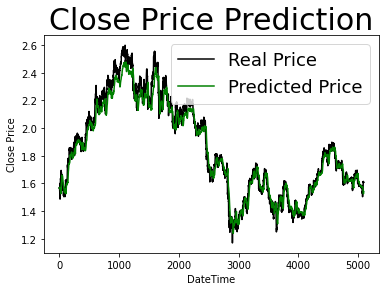

In [ ]:
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_LSTM2, color = 'green', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=30)
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [ ]:
import math

LSTM2_loss = model_LSTM2.evaluate(X_test, y_test, verbose=1)

#Err_LSTM2 = math.sqrt(LSTM2_loss)
print('\nThe error of the model with a Conv1D and an LSTM layer is:',LSTM2_loss)

160/160 [==============================] - 1s 4ms/step - loss: 0.0043 - MAPE: 2.6649

The error of the model with a Conv1D and an LSTM layer is: [0.004287969321012497, 2.664910078048706]


**GRU model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras.utils import np_utils
from keras.layers import GRU,CuDNNGRU
model_GRU = Sequential()

model_GRU.add(GRU(units=50, input_shape=(120,5),return_sequences=False))
model_GRU.add(Activation('tanh'))
model_GRU.add(Dropout(0.3))
model_GRU.add(Dense(1))
model_GRU.add(Activation('relu'))
model_GRU.compile(loss='mse', optimizer='adam', metrics = ('MAPE'))

In [ ]:
model_GRU.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                8550      
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 8,601
Trainable params: 8,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_GRU = model_GRU.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = 128, epochs = 10)

Epoch 1/10
326/326 [==============================] - 13s 32ms/step - loss: 0.0015 - MAPE: 66.5802 - val_loss: 0.0113 - val_MAPE: 5.4616
Epoch 2/10
326/326 [==============================] - 11s 33ms/step - loss: 3.9707e-04 - MAPE: 34.3259 - val_loss: 0.0098 - val_MAPE: 5.4631
Epoch 3/10
326/326 [==============================] - 12s 37ms/step - loss: 3.2098e-04 - MAPE: 32.3035 - val_loss: 0.0037 - val_MAPE: 3.1552
Epoch 4/10
326/326 [==============================] - 11s 32ms/step - loss: 2.7414e-04 - MAPE: 36.5616 - val_loss: 0.0031 - val_MAPE: 2.9305
Epoch 5/10
326/326 [==============================] - 10s 30ms/step - loss: 2.5498e-04 - MAPE: 39.8651 - val_loss: 0.0029 - val_MAPE: 2.9276
Epoch 6/10
326/326 [==============================] - 9s 29ms/step - loss: 2.3619e-04 - MAPE: 43.8792 - val_loss: 0.0029 - val_MAPE: 2.8793
Epoch 7/10
326/326 [==============================] - 9s 29ms/step - loss: 2.3378e-04 - MAPE: 46.4567 - val_loss: 0.0039 - val_MAPE: 3.5785
Epoch 8/10
326/326 

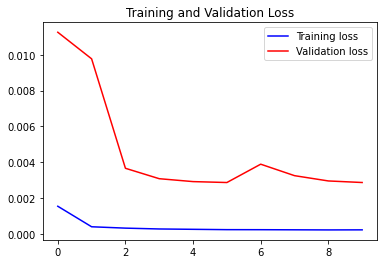

In [ ]:
loss_GRU = history_GRU.history['loss']
val_loss_GRU = history_GRU.history['val_loss']

epochs = range(len(loss_GRU))

plt.figure()

plt.plot(epochs, loss_GRU, 'b', label='Training loss')
plt.plot(epochs, val_loss_GRU, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

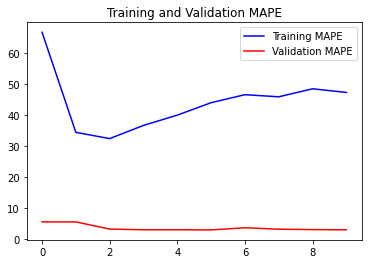

In [ ]:
mape = history_GRU.history['MAPE']
val_mape = history_GRU.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()

plt.show()

In [ ]:
pred_GRU = model_GRU.predict(X_test)

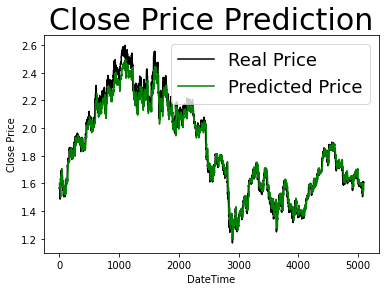

In [ ]:
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_GRU, color = 'green', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=30)
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [ ]:
import math

GRU_loss = model_GRU.evaluate(X_test, y_test, verbose=1)

#Err_GRU = math.sqrt(GRU_loss)
print('\nThe error of the model with a GRU layer is:',GRU_loss)

160/160 [==============================] - 2s 11ms/step - loss: 0.0036 - MAPE: 2.3906

The error of the model with a GRU layer is: [0.0035725559573620558, 2.3906185626983643]


**CNN-BiLSTM model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization
from keras.layers import Bidirectional

num_units = 128
activation_function = 'relu'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 128
num_epochs = 10

# Initialize the RNN
regressor2 = Sequential()

# Adding the input layer and the LSTM layer
regressor2.add(tf.keras.layers.Conv1D(120, 3, activation="relu",input_shape=(120, 5)))
regressor2.add(tf.keras.layers.AveragePooling1D(4))
regressor2.add(Bidirectional(LSTM(units = num_units, input_shape=(120, 5))))#activation = activation_function,
regressor2.add(LeakyReLU(alpha= 0.5))
regressor2.add(BatchNormalization())
regressor2.add(Dropout(0.5))
# Adding the output layer
regressor2.add(Dense(units = 1))


In [ ]:
# Compiling the RNN
regressor2.compile(optimizer = optimizer, loss = loss_function, metrics = ('MAPE'))
regressor2.summary()
# Using the training set to train the model
history_BiLSTM2 = regressor2.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = batch_size, epochs = num_epochs)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 118, 120)          1920      
                                                                 
 average_pooling1d_2 (Averag  (None, 29, 120)          0         
 ePooling1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              254976    
 nal)                                                            
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                      

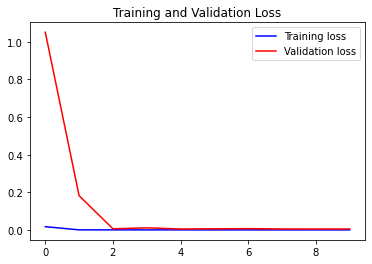

In [ ]:
loss_BiLSTM2 = history_BiLSTM2.history['loss']
val_loss_BiLSTM2 = history_BiLSTM2.history['val_loss']

epochs = range(len(loss_BiLSTM2))

plt.figure()

plt.plot(epochs, loss_BiLSTM2, 'b', label='Training loss')
plt.plot(epochs, val_loss_BiLSTM2, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

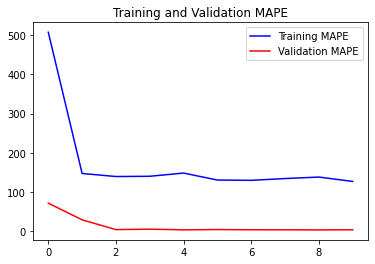

In [ ]:
mape = history_BiLSTM2.history['MAPE']
val_mape = history_BiLSTM2.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()

plt.show()

In [ ]:
pred_BiLSTM2 = regressor2.predict(X_test)

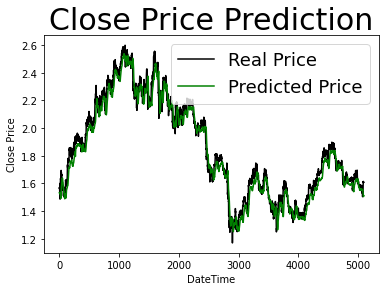

In [ ]:
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_BiLSTM2, color = 'green', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=30)
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [ ]:
import math

BiLSTM2_loss = regressor2.evaluate(X_test, y_test, verbose=1)

#Err_BiLSTM2 = math.sqrt(BiLSTM2_loss)
print('\nThe error of the model with 1 layer BiLSTM is:',BiLSTM2_loss)

160/160 [==============================] - 2s 14ms/step - loss: 0.0045 - MAPE: 2.9573

The error of the model with 1 layer BiLSTM is: [0.004533139057457447, 2.9573473930358887]


**Bi-LSTM model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization
from keras.layers import Bidirectional

num_units = 128
activation_function = 'relu'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 128
num_epochs = 10

# Initialize the RNN
regressor2 = Sequential()

# Adding the input layer and the LSTM layer
regressor2.add(Bidirectional(LSTM(units = num_units, input_shape=(120, 5))))#activation = activation_function,
regressor2.add(LeakyReLU(alpha= 0.5))
regressor2.add(BatchNormalization())
regressor2.add(Dropout(0.5))
# Adding the output layer
regressor2.add(Dense(units = 1))

#regressor2.build(input_shape=(X_train.shape[0], 120, 5))


In [ ]:
# Compiling the RNN
regressor2.compile(optimizer = optimizer, loss = loss_function, metrics = ('MAPE'))

# Using the training set to train the model
history_BiLSTM2 = regressor2.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = batch_size, epochs = num_epochs)

Epoch 1/10
326/326 [==============================] - 32s 65ms/step - loss: 0.0299 - MAPE: 809.0980 - val_loss: 1.1131 - val_MAPE: 74.1664
Epoch 2/10
326/326 [==============================] - 20s 62ms/step - loss: 0.0011 - MAPE: 187.3827 - val_loss: 0.2285 - val_MAPE: 33.7204
Epoch 3/10
326/326 [==============================] - 20s 62ms/step - loss: 8.1974e-04 - MAPE: 153.1121 - val_loss: 0.0093 - val_MAPE: 5.8668
Epoch 4/10
326/326 [==============================] - 20s 61ms/step - loss: 7.7337e-04 - MAPE: 148.7766 - val_loss: 0.0181 - val_MAPE: 7.0748
Epoch 5/10
326/326 [==============================] - 20s 62ms/step - loss: 7.8201e-04 - MAPE: 152.0167 - val_loss: 0.0068 - val_MAPE: 5.1853
Epoch 6/10
326/326 [==============================] - 20s 61ms/step - loss: 8.5756e-04 - MAPE: 156.0536 - val_loss: 0.0481 - val_MAPE: 14.3481
Epoch 7/10
326/326 [==============================] - 20s 62ms/step - loss: 7.6148e-04 - MAPE: 150.0493 - val_loss: 0.0094 - val_MAPE: 5.1226
Epoch 8/10


In [ ]:
regressor2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              137216    
 l)                                                              
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 138,497
Trainable params: 137,985
Non-trai

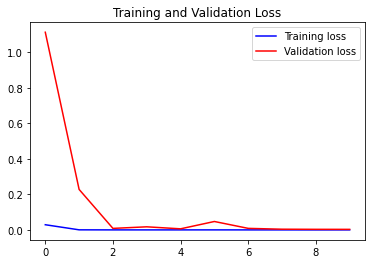

In [ ]:
loss_BiLSTM2 = history_BiLSTM2.history['loss']
val_loss_BiLSTM2 = history_BiLSTM2.history['val_loss']

epochs = range(len(loss_BiLSTM2))

plt.figure()

plt.plot(epochs, loss_BiLSTM2, 'b', label='Training loss')
plt.plot(epochs, val_loss_BiLSTM2, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

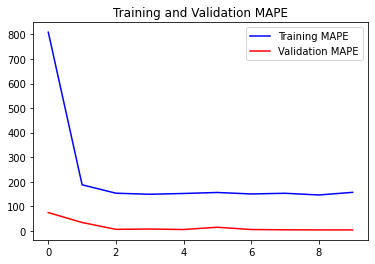

In [ ]:
mape = history_BiLSTM2.history['MAPE']
val_mape = history_BiLSTM2.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()

plt.show()

In [ ]:
pred_BiLSTM2 = regressor2.predict(X_test)

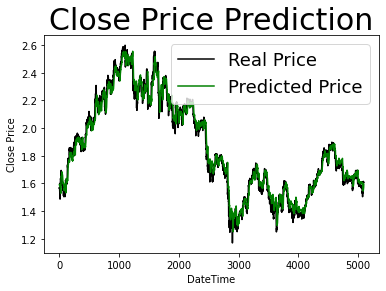

In [ ]:
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_BiLSTM2, color = 'green', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=30)
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [ ]:
import math

BiLSTM2_loss = regressor2.evaluate(X_test, y_test, verbose=1)

#Err_BiLSTM2 = math.sqrt(BiLSTM2_loss)
print('\nThe error of the model with 1 layer BiLSTM is:',BiLSTM2_loss)

160/160 [==============================] - 4s 23ms/step - loss: 0.0029 - MAPE: 2.2672

The error of the model with 1 layer BiLSTM is: [0.0029100393876433372, 2.2671947479248047]
